In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import Lasso

In [5]:
import warnings 
warnings.filterwarnings('ignore')

In [168]:
train = pd.read_csv(r'C:\Users\hi\Desktop\dse\supervised linear reggression\cass notes\loan_data_train.csv')
test = pd.read_csv(r'C:\Users\hi\Desktop\dse\supervised linear reggression\cass notes\loan_data_test.csv')

In [169]:
train.shape

(2200, 15)

In [170]:
test.shape

(300, 14)

In [171]:
test['Interest.Rate'] = np.NaN
train['data'] = 'train'
test['data'] = 'test'

In [172]:
df = pd.concat([train,test])
df

Amount.Funded.By.Investors Amount.Requested Debt.To.Income.Ratio  \
0                        25000            25000               27.56%   
1                        19750            19750               13.39%   
2                         2100             2100                3.50%   
3                        28000            28000               19.62%   
4                     17431.82            24250               23.79%   
..                         ...              ...                  ...   
295                      11975            12000               13.91%   
296                       5000             5000               17.22%   
297                       4375             4375                9.09%   
298                      13600            13600               12.85%   
299                       6000             6000                7.64%   

    Employment.Length FICO.Range Home.Ownership       ID  \
0             5 years    720-724       MORTGAGE  79542.0   
1             4 years    710-714       MORTGAGE  75473.0   
2            < 1 year    690-694            OWN  67265.0   
3           10+ years    710-714       MORTGAGE  80167.0   
4           10+ years    730-734       MORTGAGE  17240.0   
..                ...        ...            ...      ...   
295           7 years    705-709       MORTGAGE  24675.0   
296         10+ years    705-709            OWN  69456.0   
297           6 years    670-674           RENT  97954.0   
298         10+ years    675-679           RENT  36931.0   
299           2 years    675-679       MORTGAGE  34744.0   

     Inquiries.in.the.Last.6.Months Interest.Rate Loan.Length  \
0                               3.0        18.49%   60 months   
1                               3.0        17.27%   60 months   
2                               1.0        14.33%   36 months   
3                               1.0        16.29%   36 months   
4                               2.0        12.23%   60 months   
..                              ...           ...         ...   
295                             2.0           NaN   60 months   
296                             0.0           NaN   36 months   
297                             2.0           NaN   36 months   
298                             0.0           NaN   60 months   
299                             0.0           NaN   36 months   

           Loan.Purpose  Monthly.Income Open.CREDIT.Lines  \
0    debt_consolidation         8606.56                11   
1    debt_consolidation         6737.50                14   
2        major_purchase         1000.00                13   
3           credit_card         7083.33                12   
4           credit_card         5833.33                 6   
..                  ...             ...               ...   
295    home_improvement         7083.33                 7   
296  debt_consolidation         4000.00                10   
297         credit_card         2916.67                 9   
298         credit_card         5651.33                13   
299  debt_consolidation         5184.75                 8   

    Revolving.CREDIT.Balance State   data  
0                      15210    VA  train  
1                      19070    NY  train  
2                        893    LA  train  
3                      38194    NV  train  
4                      31061    OH  train  
..                       ...   ...    ...  
295                     3923    NV   test  
296                     6023    CA   test  
297                     6944    CA   test  
298                    24383    MN   test  
299                    14422    IL   test  

[2500 rows x 16 columns]

In [173]:
df['Loan.Length'].value_counts()

36 months    1950
60 months     548
.               1
Name: Loan.Length, dtype: int64

In [105]:
df['Employment.Length'].value_counts()

10+ years    653
< 1 year     249
2 years      243
3 years      235
5 years      202
4 years      191
1 year       177
6 years      163
7 years      127
8 years      108
9 years       72
.              2
Name: Employment.Length, dtype: int64

In [101]:
df['Interest.Rate']

0      18.49
1      17.27
2      14.33
3      16.29
4      12.23
       ...  
295      NaN
296      NaN
297      NaN
298      NaN
299      NaN
Name: Interest.Rate, Length: 2500, dtype: float64

In [174]:
df = df.drop(['ID','Amount.Funded.By.Investors'],axis=1)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 299
Data columns (total 14 columns):
Amount.Requested                  2499 non-null object
Debt.To.Income.Ratio              2499 non-null object
Employment.Length                 2422 non-null object
FICO.Range                        2500 non-null object
Home.Ownership                    2499 non-null object
Inquiries.in.the.Last.6.Months    2497 non-null float64
Interest.Rate                     2200 non-null object
Loan.Length                       2499 non-null object
Loan.Purpose                      2499 non-null object
Monthly.Income                    2497 non-null float64
Open.CREDIT.Lines                 2496 non-null object
Revolving.CREDIT.Balance          2497 non-null object
State                             2499 non-null object
data                              2500 non-null object
dtypes: float64(2), object(12)
memory usage: 293.0+ KB


In [110]:
df['Debt.To.Income.Ratio']

0      27.56
1      13.39
2       3.50
3      19.62
4      23.79
       ...  
295    13.91
296    17.22
297     9.09
298    12.85
299     7.64
Name: Debt.To.Income.Ratio, Length: 2500, dtype: float64

In [114]:
df['Loan.Length']

0      60
1      60
2      36
3      36
4      60
       ..
295    60
296    36
297    36
298    60
299    36
Name: Loan.Length, Length: 2500, dtype: object

In [177]:
df['Debt.To.Income.Ratio'] = df['Debt.To.Income.Ratio'].str.replace('%','')
df['Interest.Rate'] = df['Interest.Rate'].str.replace('%','')

In [119]:
df['Employment.Length'].value_counts()

10+ years    653
< 1 year     249
2 years      243
3 years      235
5 years      202
4 years      191
1 year       177
6 years      163
7 years      127
8 years      108
9 years       72
Name: Employment.Length, dtype: int64

In [178]:
df['Employment.Length'] = df['Employment.Length'].str.replace('+','').str.replace('years','').str.replace('< 1','0').str.replace('year','')

In [186]:
df['Employment.Length']=df['Employment.Length'].astype(float)
df['Amount.Requested']=df['Amount.Requested'].astype(float)
df['Open.CREDIT.Lines']=df['Open.CREDIT.Lines'].astype(float)
df['Revolving.CREDIT.Balance']=df['Revolving.CREDIT.Balance'].astype(float)
df['Interest.Rate'] = df['Interest.Rate'].astype(float)
df['Debt.To.Income.Ratio']=df['Debt.To.Income.Ratio'].astype(float)

In [176]:
df = df.replace('.',np.NaN)

In [180]:
df[['First','Last']] = df['FICO.Range'].str.split("-",expand=True).astype(float)

In [181]:
df['FICO.Range']=df.loc[:,'First':'Last'].mean(axis=1)

In [182]:
df= df.drop(['First','Last'],axis=1)
df.columns

Index(['Amount.Requested', 'Debt.To.Income.Ratio', 'Employment.Length',
       'FICO.Range', 'Home.Ownership', 'Inquiries.in.the.Last.6.Months',
       'Interest.Rate', 'Loan.Length', 'Loan.Purpose', 'Monthly.Income',
       'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance', 'State', 'data'],
      dtype='object')

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 299
Data columns (total 14 columns):
Amount.Requested                  2495 non-null float64
Debt.To.Income.Ratio              2499 non-null float64
Employment.Length                 2420 non-null float64
FICO.Range                        2500 non-null float64
Home.Ownership                    2499 non-null object
Inquiries.in.the.Last.6.Months    2497 non-null float64
Interest.Rate                     2200 non-null float64
Loan.Length                       2498 non-null object
Loan.Purpose                      2499 non-null object
Monthly.Income                    2497 non-null float64
Open.CREDIT.Lines                 2491 non-null float64
Revolving.CREDIT.Balance          2495 non-null float64
State                             2498 non-null object
data                              2500 non-null object
dtypes: float64(9), object(5)
memory usage: 293.0+ KB


In [188]:
cat_col=df[['Home.Ownership','Loan.Purpose','State','Loan.Length']]

In [189]:
for col in cat_col:
    print(col)
    freqs=df[col].value_counts()
    print(freqs)
    k=freqs.index[freqs>20][:]
    print(k)
    for cat in k:
        print(cat)
        name=col+'_'+cat
        print(name)
        df[name]=(df[col]==cat).astype(int)
    del df[col]
    print(col)

Home.Ownership
MORTGAGE    1147
RENT        1146
OWN          200
OTHER          5
NONE           1
Name: Home.Ownership, dtype: int64
Index(['MORTGAGE', 'RENT', 'OWN'], dtype='object')
MORTGAGE
Home.Ownership_MORTGAGE
RENT
Home.Ownership_RENT
OWN
Home.Ownership_OWN
Home.Ownership
Loan.Purpose
debt_consolidation    1307
credit_card            444
other                  200
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan.Purpose, dtype: int64
Index(['debt_consolidation', 'credit_card', 'other', 'home_improvement',
       'major_purchase', 'small_business', 'car', 'wedding', 'medical',
       'moving', 'vacation'],
      dtype='object')
debt_consolidation
Loan.Purpose_debt_consolidation
credit_card
Loan.Purpose_credit_card
other
Loa

In [190]:
df.head(2)

Amount.Requested  Debt.To.Income.Ratio  Employment.Length  FICO.Range  \
0           25000.0                 27.56                5.0       722.0   
1           19750.0                 13.39                4.0       712.0   

   Inquiries.in.the.Last.6.Months  Interest.Rate  Monthly.Income  \
0                             3.0          18.49         8606.56   
1                             3.0          17.27         6737.50   

   Open.CREDIT.Lines  Revolving.CREDIT.Balance   data  ...  State_NV  \
0               11.0                   15210.0  train  ...         0   
1               14.0                   19070.0  train  ...         0   

   State_OR  State_SC  State_WI  State_KY  State_LA  State_OK  State_KS  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   

   Loan.Length_36 months  Loan.Length_60 months  
0                      0                      1  
1                      0                      1  

[2 rows x 55 columns]

In [191]:
for col in df.columns:
    if (col not in ['Interest.Rate','data'])& (df[col].isnull().sum()>0):
        df.loc[df[col].isnull(),col]=df.loc[df['data']=='train',col].mean()

In [193]:
train_n = df[df['data']=='train']
test_n = df[df['data']=='test']

In [196]:
train_n = train_n.drop('data',axis=1)
test_n = test_n.drop('data',axis=1)

In [197]:
test_n = test_n.drop('Interest.Rate',axis=1)

In [208]:
test_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 53 columns):
Amount.Requested                   300 non-null float64
Debt.To.Income.Ratio               300 non-null float64
Employment.Length                  300 non-null float64
FICO.Range                         300 non-null float64
Inquiries.in.the.Last.6.Months     300 non-null float64
Monthly.Income                     300 non-null float64
Open.CREDIT.Lines                  300 non-null float64
Revolving.CREDIT.Balance           300 non-null float64
Home.Ownership_MORTGAGE            300 non-null int32
Home.Ownership_RENT                300 non-null int32
Home.Ownership_OWN                 300 non-null int32
Loan.Purpose_debt_consolidation    300 non-null int32
Loan.Purpose_credit_card           300 non-null int32
Loan.Purpose_other                 300 non-null int32
Loan.Purpose_home_improvement      300 non-null int32
Loan.Purpose_major_purchase        300 non-null int32
Loan.Purpose_sm

In [207]:
train_n.shape

(2200, 54)

In [215]:
from sklearn.metrics import mean_absolute_error

In [209]:
X = train_n.drop('Interest.Rate',axis=1)
y = train_n['Interest.Rate']

In [222]:
lm=LinearRegression()
lm.fit(X_train,y_train)
predicted_lr = lm.predict(X_train)

In [210]:
from sklearn.model_selection import train_test_split
# train data - 70% and test data - 30%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1540, 53)
(1540,)
(660, 53)
(660,)


In [211]:
# R square value for both train and test data to check if the model
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')

R^2 score for train: 0.7655838456399523
R^2 score for test: 0.7522625801571784


In [212]:
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Interest.Rate   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     132.4
Date:                Thu, 30 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:39:27   Log-Likelihood:                -4667.4
No. Observations:                2200   AIC:                             9443.
Df Residuals:                    2146   BIC:                             9750.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              73.3247      1.991     36.824      0.000      69.420      77.230
Amount.Requested                    0.0002   7.18e-06     22.288      0.000       0.000       0.000
Debt.To.Income.Ratio              1.24e-06      0.007      0.000      1.000      -0.013       0.013
Employment.Length                   0.0201      0.013      1.551      0.121      -0.005       0.046
FICO.Range                         -0.0865      0.001    -64.462      0.000      -0.089      -0.084
Inquiries.in.the.Last.6.Months      0.3401      0.037      9.197      0.000       0.268       0.413
Monthly.Income                  -2.546e-05   1.31e-05     -1.950      0.051   -5.11e-05    1.42e-07
Open.CREDIT.Lines                  -0.0367      0.011     -3.269      0.001      -0.059      -0.015
Revolving.CREDIT.Balance         -2.98e-06   2.71e-06     -1.100      0.271   -8.29e-06    2.33e-06
Home.Ownership_MORTGAGE            -2.3394      0.846     -2.765      0.006      -3.999      -0.680
Home.Ownership_RENT                -2.1218      0.846     -2.508      0.012      -3.781      -0.463
Home.Ownership_OWN                 -2.0071      0.857     -2.342      0.019      -3.688      -0.327
Loan.Purpose_debt_consolidation    -0.6495      0.348     -1.865      0.062      -1.332       0.033
Loan.Purpose_credit_card           -0.7647      0.359     -2.129      0.033      -1.469      -0.060
Loan.Purpose_other                  0.1661      0.374      0.444      0.657      -0.568       0.900
Loan.Purpose_home_improvement      -0.5701      0.386     -1.477      0.140      -1.327       0.187
Loan.Purpose_major_purchase        -0.2945      0.408     -0.723      0.470      -1.094       0.505
Loan.Purpose_small_business        -0.1580      0.411     -0.385      0.700      -0.963       0.647
Loan.Purpose_car                   -0.4018      0.459     -0.876      0.381      -1.302       0.498
Loan.Purpose_wedding               -0.8746      0.488     -1.793      0.073      -1.831       0.082
Loan.Purpose_medical               -0.4671      0.528     -0.884      0.377      -1.503       0.569
Loan.Purpose_moving                 0.8326      0.534      1.560      0.119      -0.214       1.879
Loan.Purpose_vacation               0.3433      0.592      0.580      0.562      -0.818       1.504
State_CA                           -0.1924      0.207     -0.930      0.353      -0.598       0.213
State_NY                           -0.2007      0.225     -0.893      0.372      -0.641       0.240
State_TX                            0.4446      0.246      1.811      0.070      -0.037       0.926
State_FL                           -0.0561      0.244     -0.230      0.818      -0.534       0.422
State_IL                           -0.5887      0.283     -2.081      0.038      -1

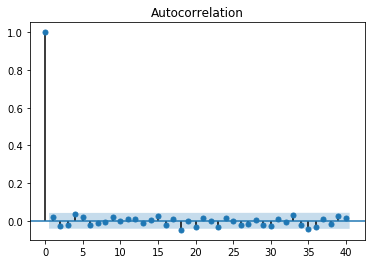

In [214]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40, alpha=0.05)
acf.show()

In [225]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

(157.63172432401507, 0.0)


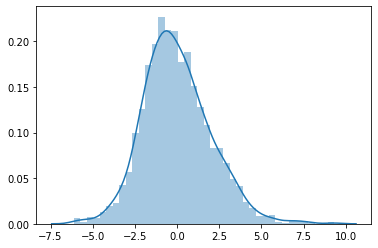

In [226]:
import seaborn as sns

sns.distplot(lin_reg.resid)

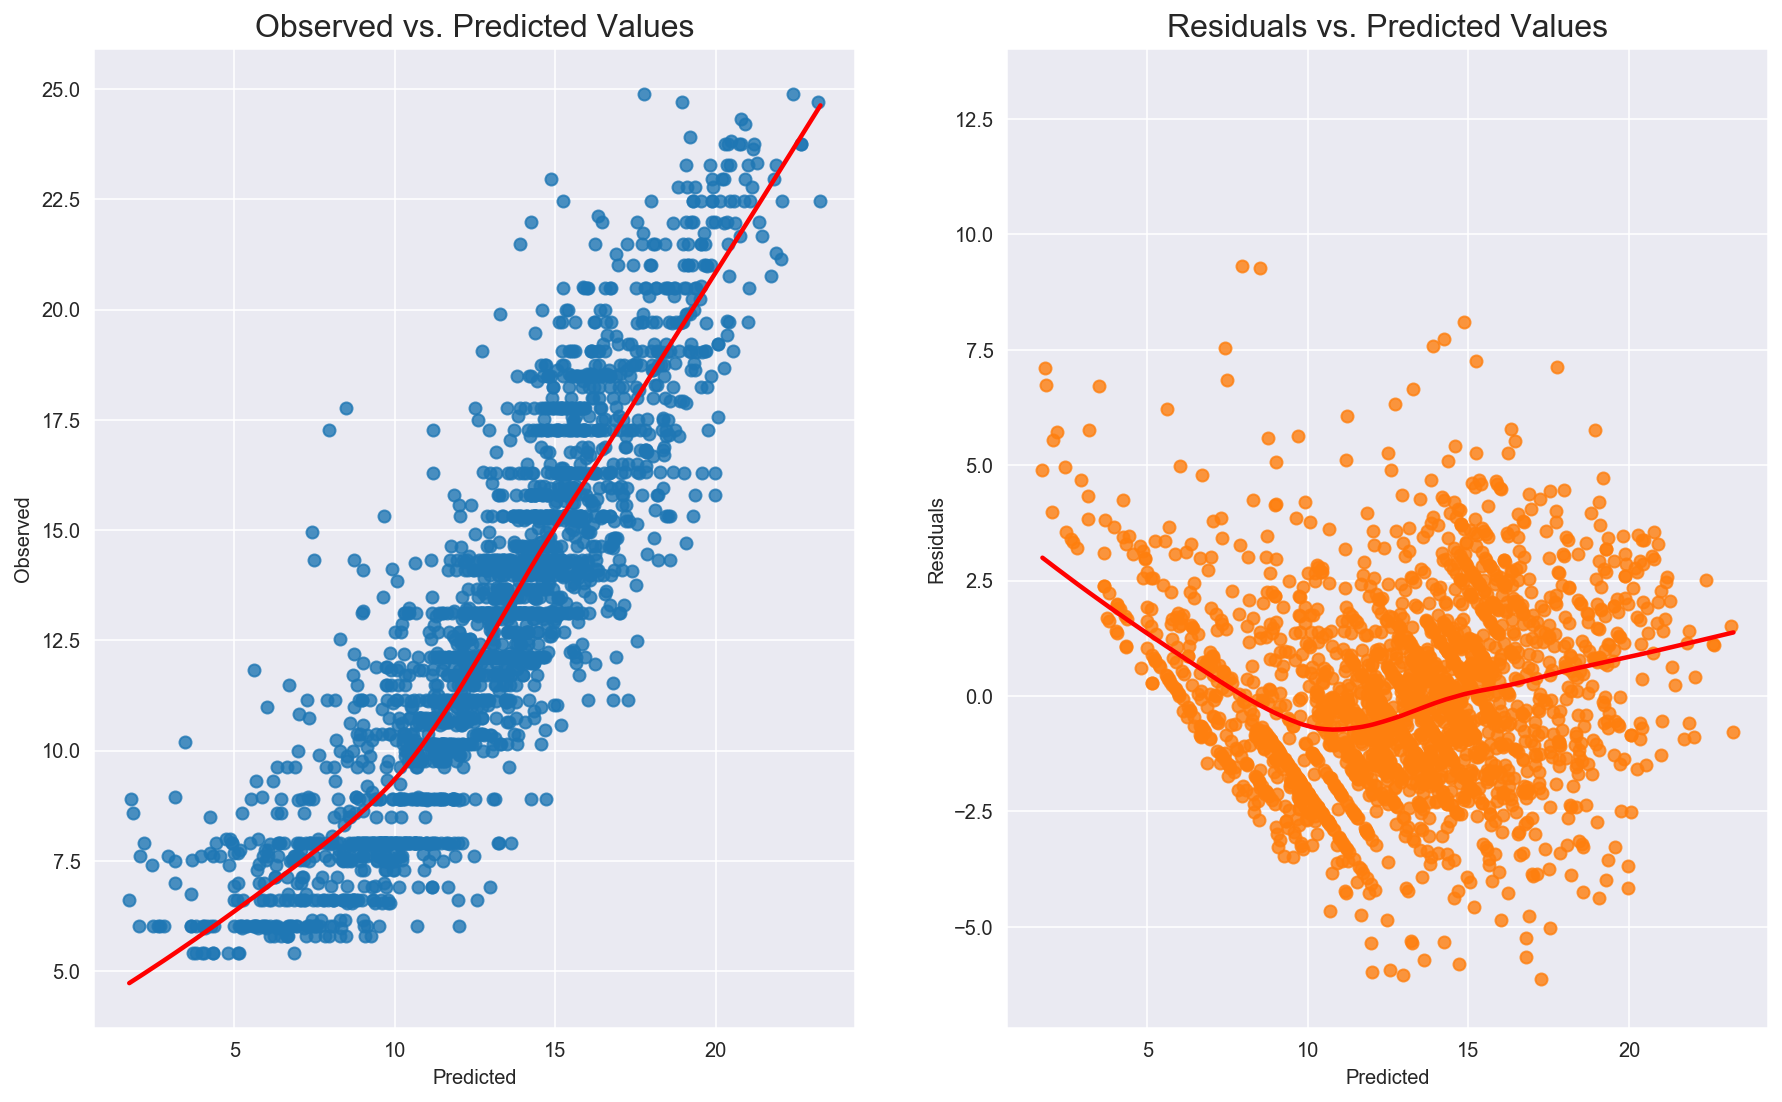

In [227]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)  

In [228]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)

(1.2170729385571482, 0.0006636586892615481)

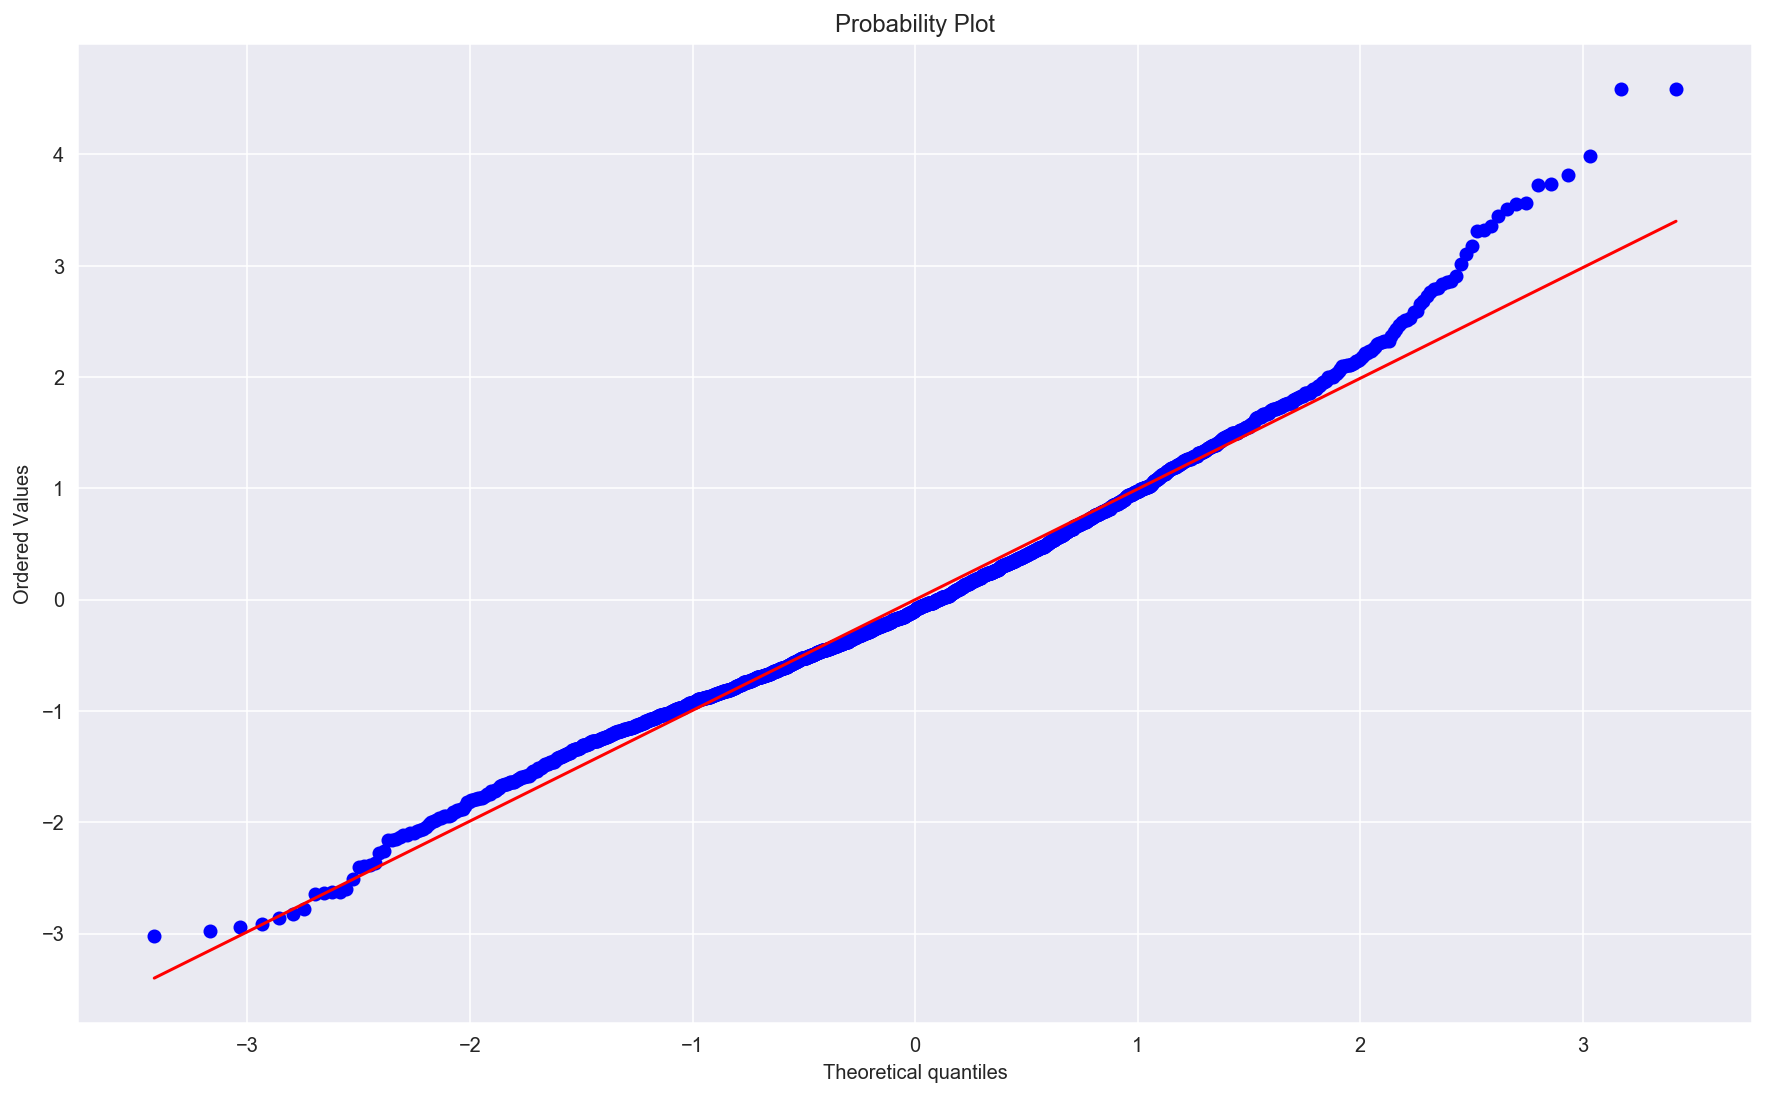

In [229]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
st_residual = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

In [230]:
lin_reg.resid.mean()

5.3827703506602697e-11

[('F statistic', 0.8935117747216396), ('p-value', 0.9656103202541421)]

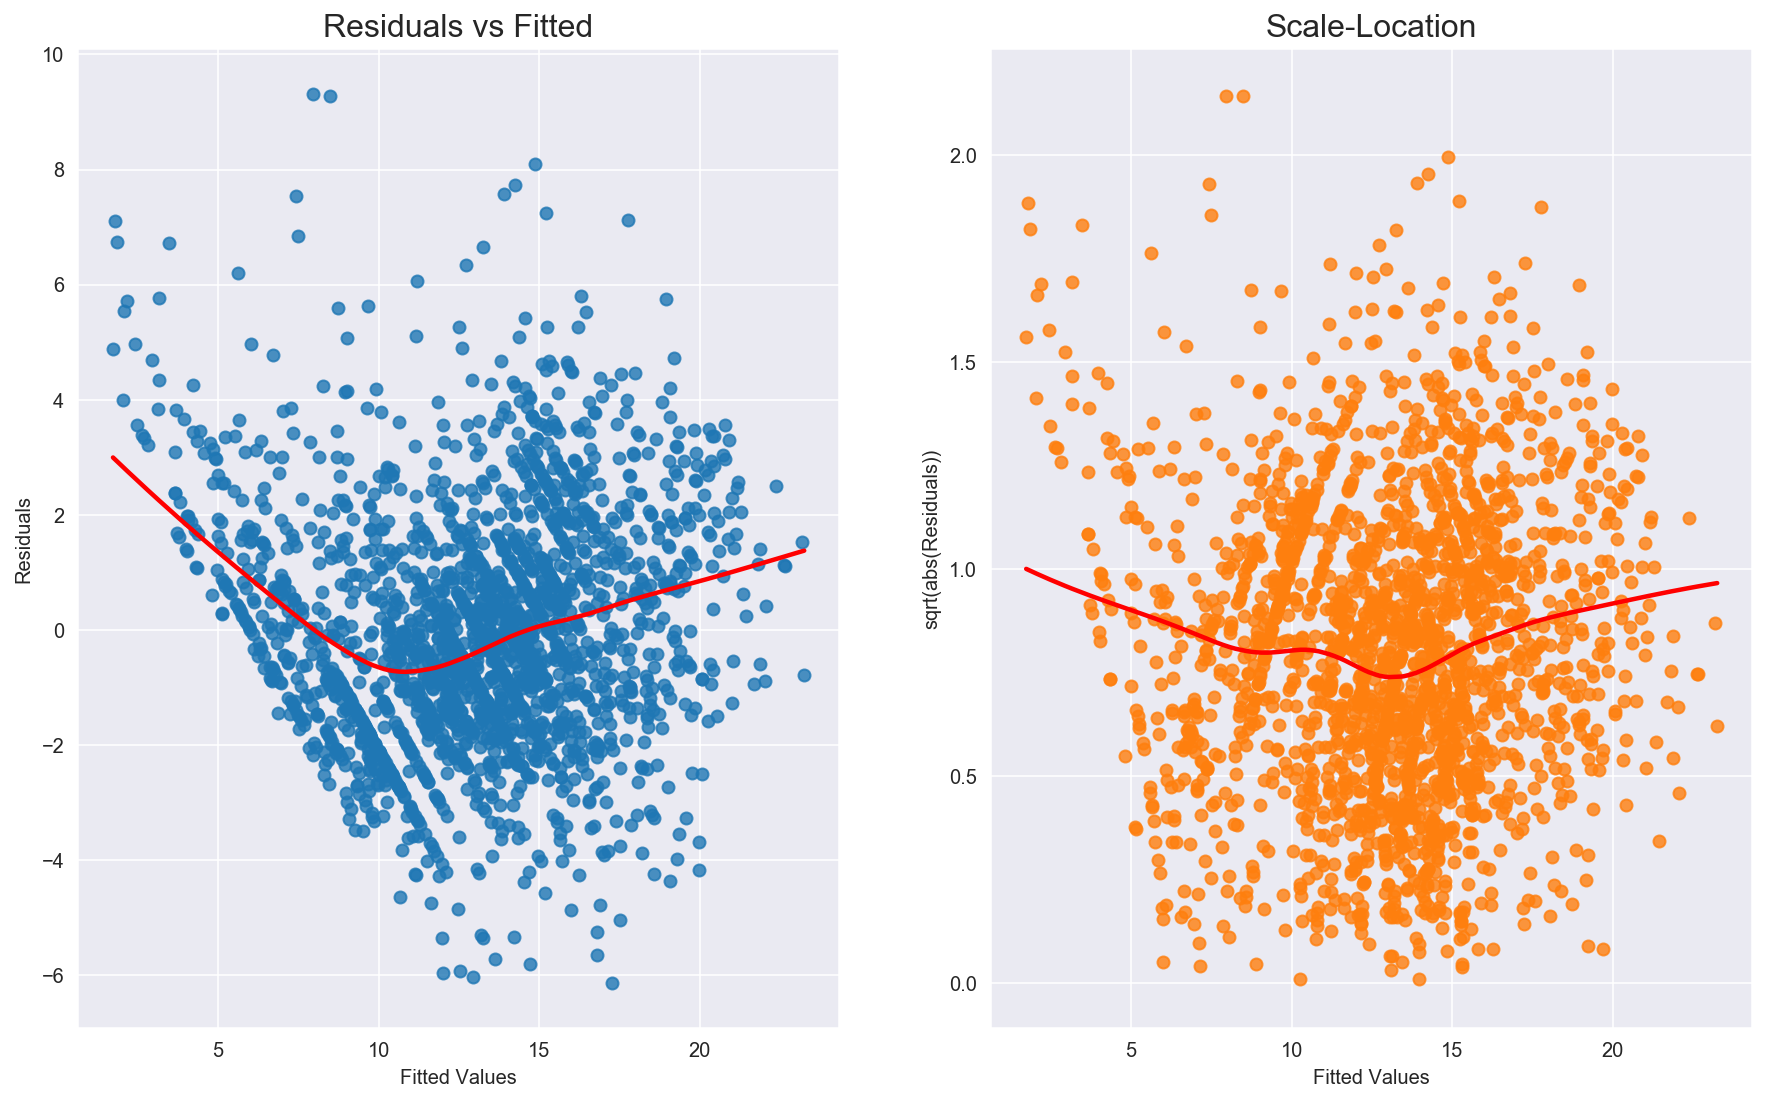

In [231]:
from statsmodels.compat import lzip
import numpy as np
from statsmodels.compat import lzip
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

model = lin_reg
fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

In [232]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

Amount.Requested  Debt.To.Income.Ratio  Employment.Length  FICO.Range  \
vif           1.66921              1.393239           1.117838    1.177266   

     Inquiries.in.the.Last.6.Months  Monthly.Income  Open.CREDIT.Lines  \
vif                        1.067962        1.485878           1.335072   

     Revolving.CREDIT.Balance  Home.Ownership_MORTGAGE  Home.Ownership_RENT  \
vif                  1.349122                93.704108            93.401342   

     ...  State_NV  State_OR  State_SC  State_WI  State_KY  State_LA  \
vif  ...   1.20695  1.190818   1.19687  1.176376   1.15065  1.154244   

     State_OK  State_KS  Loan.Length_36 months  Loan.Length_60 months  
vif  1.144293  1.149923             190.551299             190.872108  

[1 rows x 53 columns]

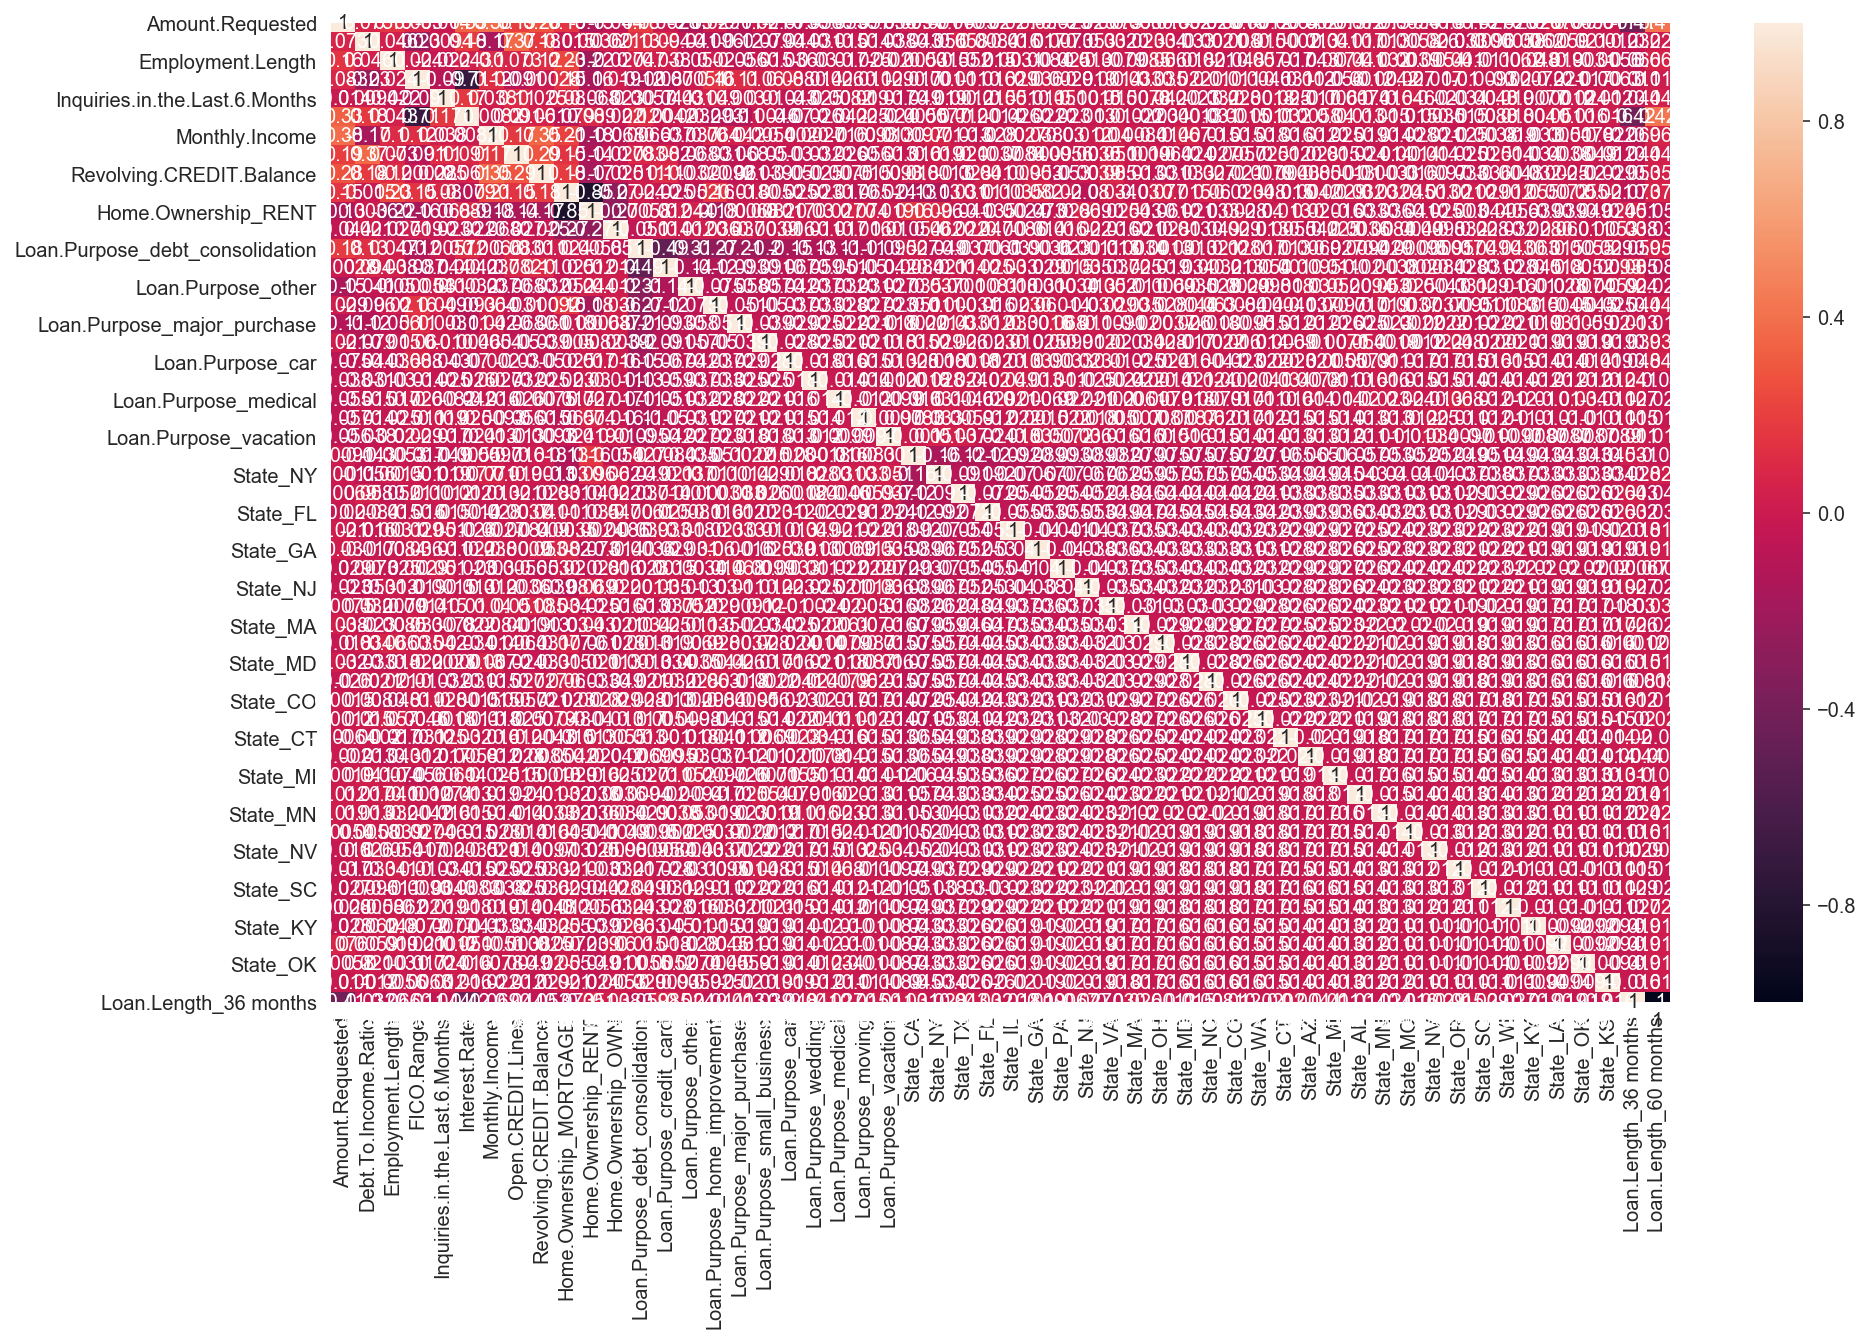

In [234]:
import seaborn as sns
sns.heatmap(train_n.corr(), annot=True)

In [235]:
train_n

Amount.Requested  Debt.To.Income.Ratio  Employment.Length  FICO.Range  \
0              25000.0                 27.56                5.0       722.0   
1              19750.0                 13.39                4.0       712.0   
2               2100.0                  3.50                0.0       692.0   
3              28000.0                 19.62               10.0       712.0   
4              24250.0                 23.79               10.0       732.0   
...                ...                   ...                ...         ...   
2195           30000.0                 12.10               10.0       677.0   
2196            4200.0                 14.16                2.0       702.0   
2197           19800.0                 15.03                6.0       677.0   
2198           18000.0                 11.63                4.0       672.0   
2199            7550.0                  3.83                2.0       712.0   

      Inquiries.in.the.Last.6.Months  Interest.Rate  Monthly.Income  \
0                                3.0          18.49         8606.56   
1                                3.0          17.27         6737.50   
2                                1.0          14.33         1000.00   
3                                1.0          16.29         7083.33   
4                                2.0          12.23         5833.33   
...                              ...            ...             ...   
2195                             1.0          23.28         7083.33   
2196                             0.0          14.33         3850.00   
2197                             3.0          15.31         6666.67   
2198                             2.0          20.99         9051.83   
2199                             0.0          10.16         8333.33   

      Open.CREDIT.Lines  Revolving.CREDIT.Balance  Home.Ownership_MORTGAGE  \
0                  11.0                   15210.0                        1   
1                  14.0                   19070.0                        1   
2                  13.0                     893.0                        0   
3                  12.0                   38194.0                        1   
4                   6.0                   31061.0                        1   
...                 ...                       ...                      ...   
2195               16.0                   17969.0                        1   
2196                4.0                    5718.0                        0   
2197               10.0                   46879.0                        1   
2198                5.0                   32394.0                        0   
2199               10.0                   10204.0                        1   

      ...  State_NV  State_OR  State_SC  State_WI  State_KY  State_LA  \
0     ...         0         0         0         0         0         0   
1     ...         0         0         0         0         0         0   
2     ...         0         0         0         0         0         1   
3     ...         1         0         0         0         0         0   
4     ...         0         0         0         0         0         0   
...   ...       ...       ...       ...       ...       ...       ...   
2195  ...         0         0         0         0         0         0   
2196  ...         0         0         0         0         0         0   
2197  ...         0         0         0         0         0         0   
2198  ...         0         0         0         0         0         0   
2199  ...         0         0         0         0         0         0   

      State_OK  State_KS  Loan.Length_36 months  Loan.Length_60 months  
0            0         0                      0                      1  
1            0         0                      0                      1  
2            0         0                      1                      0  
3            0         0                      1                      0  
4            0         0 

In [236]:
#residual plot
sns.set(style = 'whitegrid')

train_n['predictions'] = model.predict(X_constant)
residuals = model.resid
residuals

0       1.811198
1       0.730701
2       1.466085
3       2.311576
4      -3.208600
          ...   
2195    2.285511
2196   -0.277626
2197   -3.981476
2198    1.269920
2199   -0.336680
Length: 2200, dtype: float64

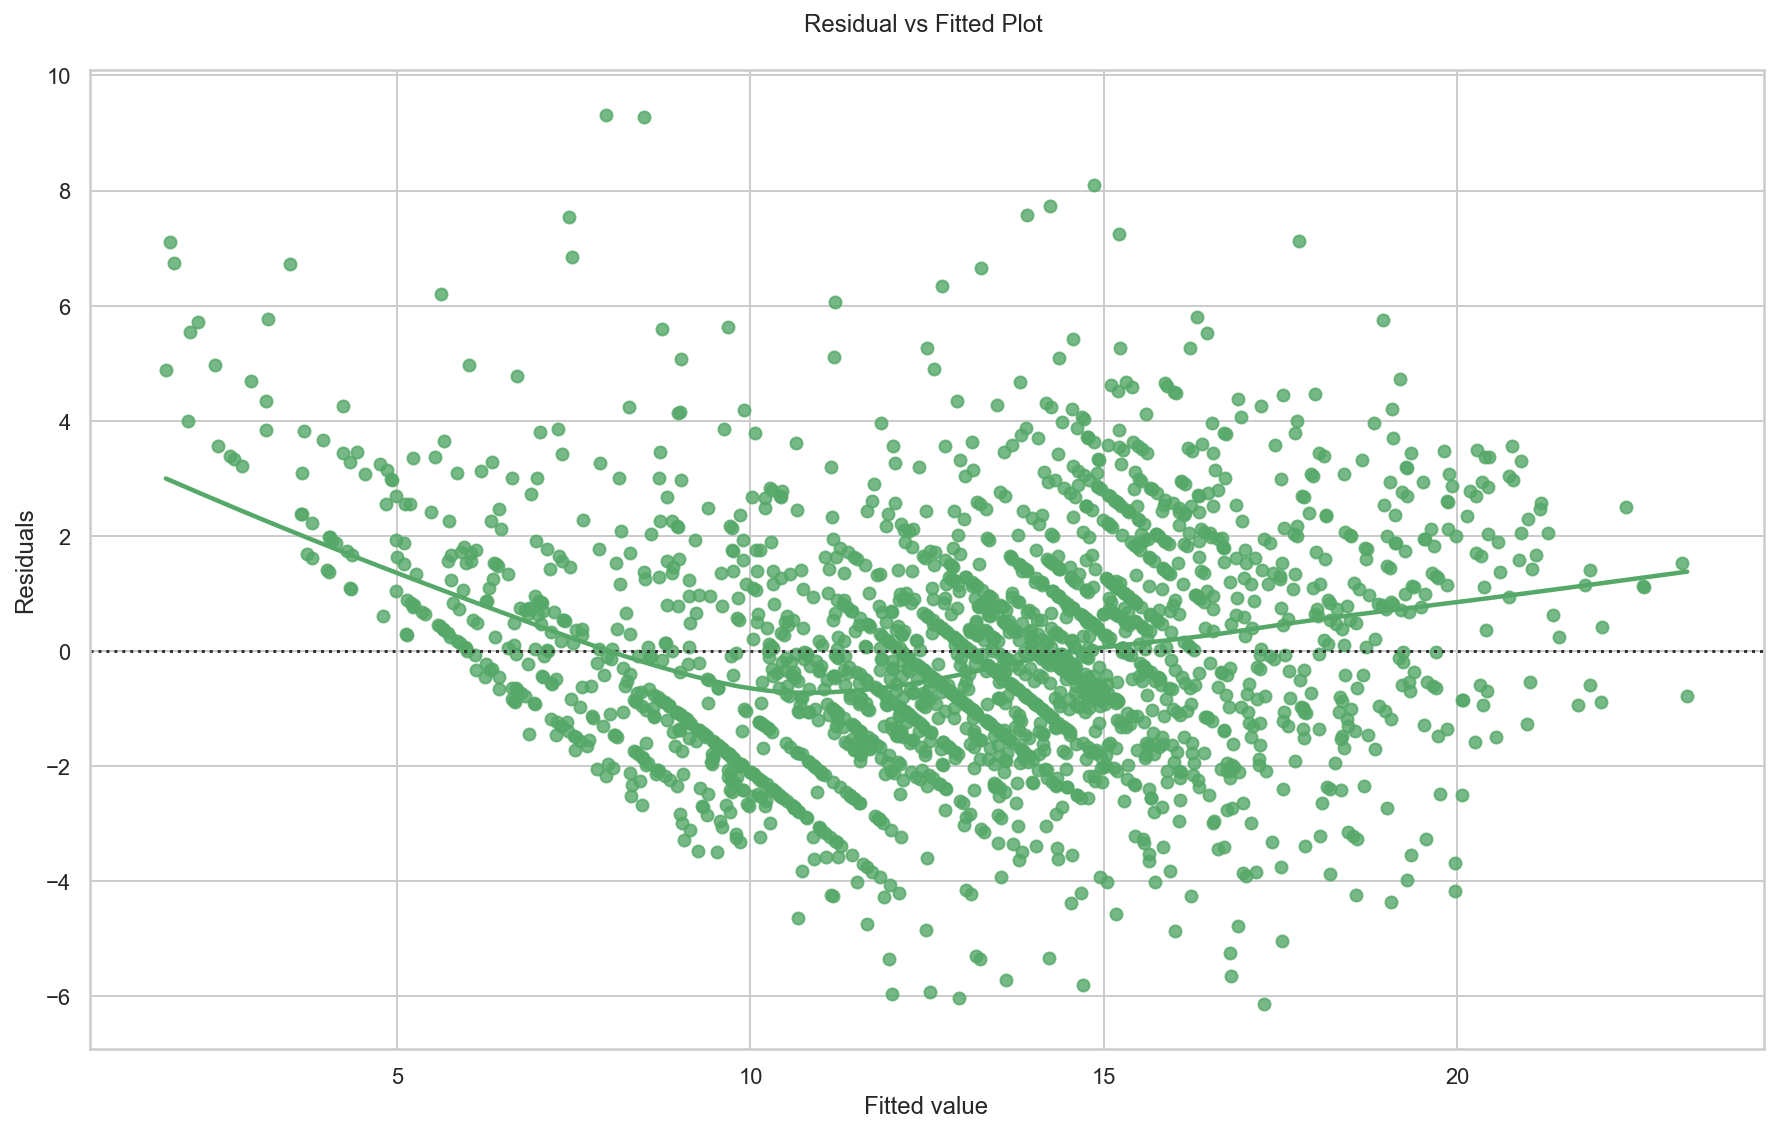

In [238]:
ax = sns.residplot(train_n.predictions, residuals, lowess = True, color = 'g')
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
plt.show()

In [241]:
train_n.drop('predictions',axis=1,inplace=True)

In [250]:
df2 = train_n.copy()
final_df = df2.transform(lambda x: x**0.5)
final_df.head()

Amount.Requested  Debt.To.Income.Ratio  Employment.Length  FICO.Range  \
0        158.113883              5.249762           2.236068   26.870058   
1        140.534693              3.659235           2.000000   26.683328   
2         45.825757              1.870829           0.000000   26.305893   
3        167.332005              4.429447           3.162278   26.683328   
4        155.724115              4.877499           3.162278   27.055499   

   Inquiries.in.the.Last.6.Months  Interest.Rate  Monthly.Income  \
0                        1.732051       4.300000       92.771547   
1                        1.732051       4.155719       82.082276   
2                        1.000000       3.785499       31.622777   
3                        1.000000       4.036087       84.162521   
4                        1.414214       3.497142       76.376240   

   Open.CREDIT.Lines  Revolving.CREDIT.Balance  Home.Ownership_MORTGAGE  ...  \
0           3.316625                123.328829                      1.0  ...   
1           3.741657                138.094171                      1.0  ...   
2           3.605551                 29.883106                      0.0  ...   
3           3.464102                195.432853                      1.0  ...   
4           2.449490                176.241312                      1.0  ...   

   State_NV  State_OR  State_SC  State_WI  State_KY  State_LA  State_OK  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2       0.0       0.0       0.0       0.0       0.0       1.0       0.0   
3       1.0       0.0       0.0       0.0       0.0       0.0       0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

   State_KS  Loan.Length_36 months  Loan.Length_60 months  
0       0.0                    0.0                    1.0  
1       0.0                    0.0                    1.0  
2       0.0                    1.0                    0.0  
3       0.0                    1.0                    0.0  
4       0.0                    0.0                    1.0  

[5 rows x 54 columns]

In [251]:
X = final_df.drop('Interest.Rate',axis=1)
y = final_df['Interest.Rate']
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Interest.Rate   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     148.7
Date:                Thu, 30 Jan 2020   Prob (F-statistic):               0.00
Time:                        16:27:14   Log-Likelihood:                -247.69
No. Observations:                2200   AIC:                             603.4
Df Residuals:                    2146   BIC:                             911.0
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              21.2722      0.353     60.262      0.000      20.580      21.964
Amount.Requested                    0.0050      0.000     22.301      0.000       0.005       0.005
Debt.To.Income.Ratio               -0.0025      0.007     -0.374      0.709      -0.016       0.011
Employment.Length                   0.0064      0.006      1.023      0.306      -0.006       0.019
FICO.Range                         -0.6740      0.010    -69.425      0.000      -0.693      -0.655
Inquiries.in.the.Last.6.Months      0.1066      0.009     12.279      0.000       0.090       0.124
Monthly.Income                     -0.0008      0.000     -2.208      0.027      -0.002   -9.32e-05
Open.CREDIT.Lines                  -0.0554      0.010     -5.556      0.000      -0.075      -0.036
Revolving.CREDIT.Balance           -0.0002      0.000     -1.462      0.144      -0.000    6.62e-05
Home.Ownership_MORTGAGE            -0.3029      0.114     -2.669      0.008      -0.526      -0.080
Home.Ownership_RENT                -0.2836      0.114     -2.498      0.013      -0.506      -0.061
Home.Ownership_OWN                 -0.2665      0.115     -2.317      0.021      -0.492      -0.041
Loan.Purpose_debt_consolidation    -0.0849      0.047     -1.816      0.070      -0.177       0.007
Loan.Purpose_credit_card           -0.1033      0.048     -2.140      0.032      -0.198      -0.009
Loan.Purpose_other                  0.0334      0.050      0.664      0.507      -0.065       0.132
Loan.Purpose_home_improvement      -0.0810      0.052     -1.564      0.118      -0.183       0.021
Loan.Purpose_major_purchase        -0.0297      0.055     -0.543      0.587      -0.137       0.078
Loan.Purpose_small_business        -0.0213      0.055     -0.386      0.699      -0.129       0.087
Loan.Purpose_car                   -0.0602      0.061     -0.979      0.328      -0.181       0.060
Loan.Purpose_wedding               -0.1177      0.065     -1.799      0.072      -0.246       0.011
Loan.Purpose_medical               -0.0851      0.071     -1.201      0.230      -0.224       0.054
Loan.Purpose_moving                 0.1119      0.072      1.563      0.118      -0.029       0.252
Loan.Purpose_vacation               0.0501      0.079      0.630      0.528      -0.106       0.206
State_CA                           -0.0170      0.028     -0.614      0.539      -0.072       0.037
State_NY                           -0.0191      0.030     -0.633      0.527      -0.078       0.040
State_TX                            0.0643      0.033      1.950      0.051      -0.000       0.129
State_FL                           -0.0028      0.033     -0.084      0.933      -0.067       0.061
State_IL                           -0.0849      0.038     -2.238      0.025      -0

In [245]:
final_df = train_n.copy()
final_df1 = final_df.transform(lambda x: 1/x)
final_df1.head()

Amount.Requested  Debt.To.Income.Ratio  Employment.Length  FICO.Range  \
0          0.000040              0.036284               0.20    0.001385   
1          0.000051              0.074683               0.25    0.001404   
2          0.000476              0.285714                inf    0.001445   
3          0.000036              0.050968               0.10    0.001404   
4          0.000041              0.042034               0.10    0.001366   

   Inquiries.in.the.Last.6.Months  Interest.Rate  Monthly.Income  \
0                        0.333333       0.054083        0.000116   
1                        0.333333       0.057904        0.000148   
2                        1.000000       0.069784        0.001000   
3                        1.000000       0.061387        0.000141   
4                        0.500000       0.081766        0.000171   

   Open.CREDIT.Lines  Revolving.CREDIT.Balance  Home.Ownership_MORTGAGE  ...  \
0           0.090909                  0.000066                      1.0  ...   
1           0.071429                  0.000052                      1.0  ...   
2           0.076923                  0.001120                      inf  ...   
3           0.083333                  0.000026                      1.0  ...   
4           0.166667                  0.000032                      1.0  ...   

   State_NV  State_OR  State_SC  State_WI  State_KY  State_LA  State_OK  \
0       inf       inf       inf       inf       inf       inf       inf   
1       inf       inf       inf       inf       inf       inf       inf   
2       inf       inf       inf       inf       inf       1.0       inf   
3       1.0       inf       inf       inf       inf       inf       inf   
4       inf       inf       inf       inf       inf       inf       inf   

   State_KS  Loan.Length_36 months  Loan.Length_60 months  
0       inf                    inf                    1.0  
1       inf                    inf                    1.0  
2       inf                    1.0                    inf  
3       inf                    1.0                    inf  
4       inf                    inf                    1.0  

[5 rows x 54 columns]

In [252]:
sns.set(style = 'whitegrid')

predictions= model.predict(X_constant)
residuals = model.resid
residuals

0       0.269202
1       0.103890
2       0.239219
3       0.369848
4      -0.371417
          ...   
2195    0.195202
2196    0.032086
2197   -0.541274
2198    0.014877
2199   -0.016761
Length: 2200, dtype: float64

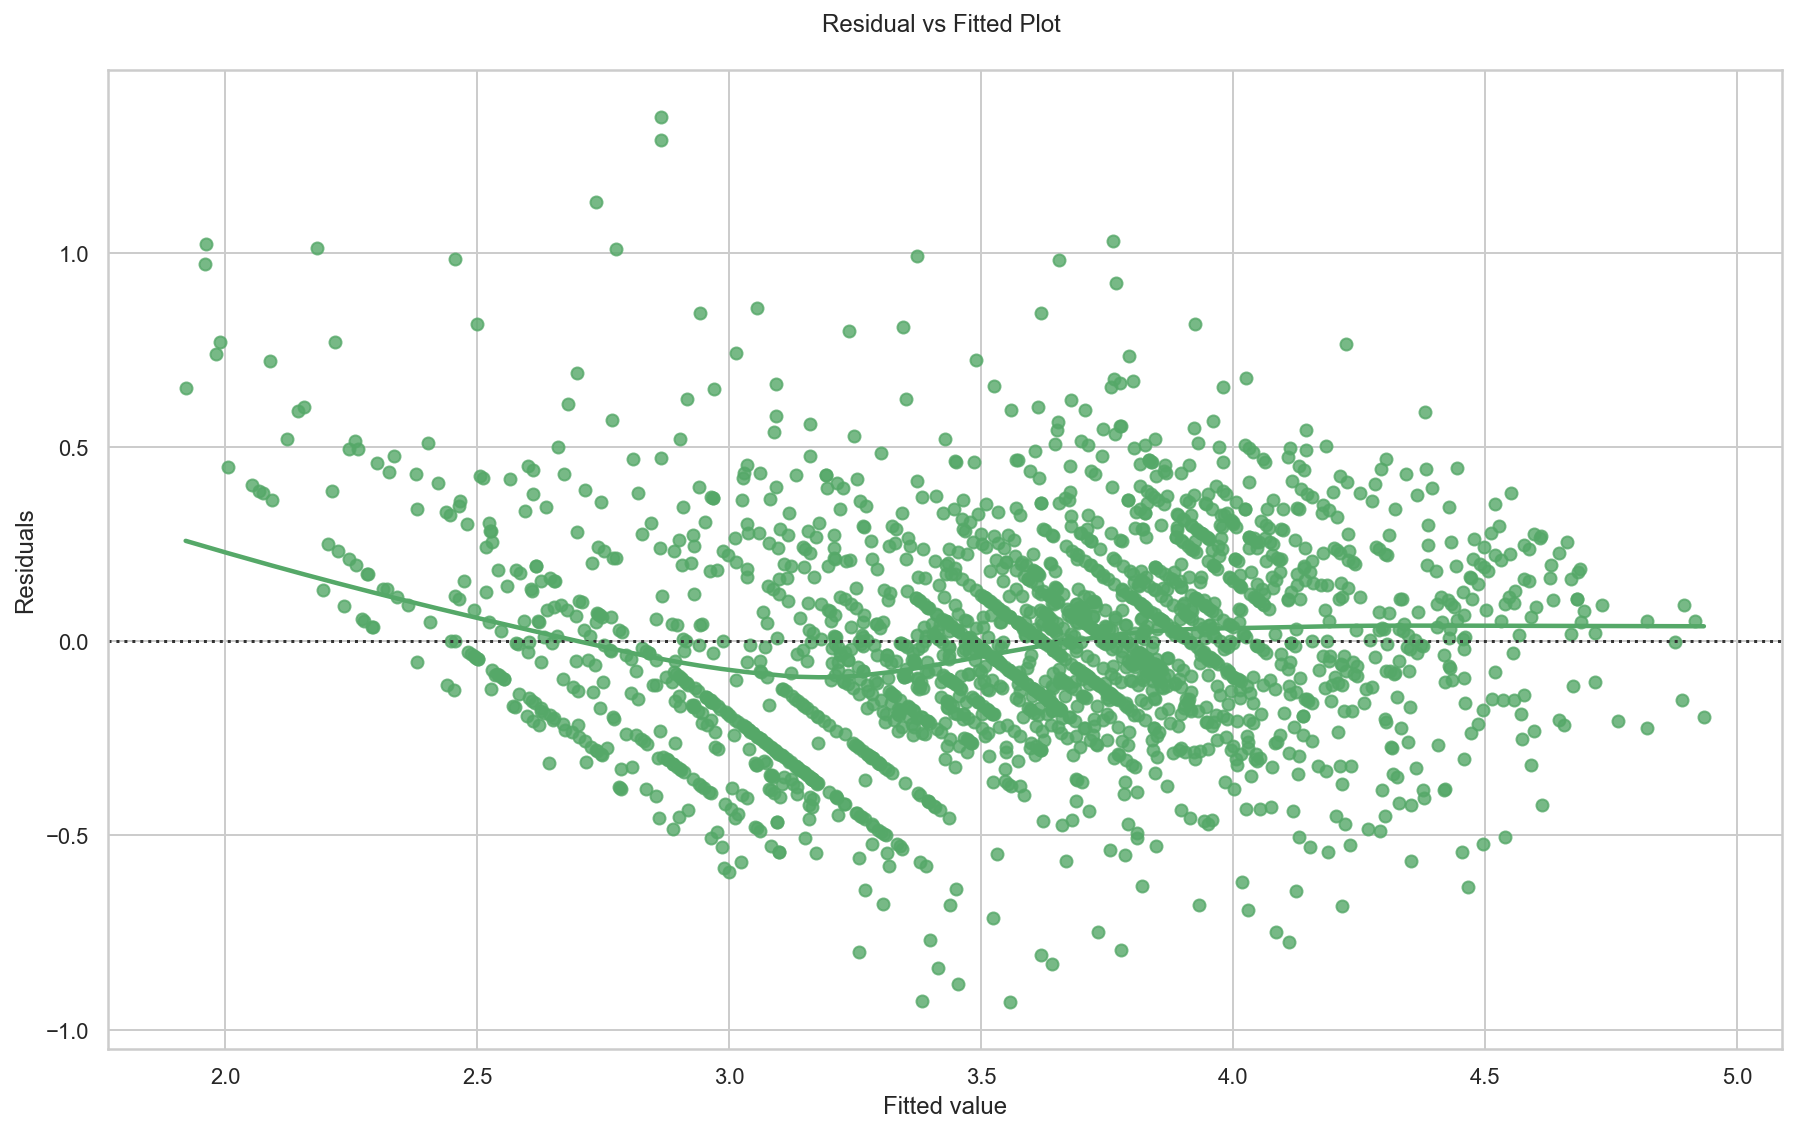

In [253]:
ax = sns.residplot(predictions, residuals, lowess = True, color = 'g')
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
plt.show()

In [254]:
final_df.columns

Index(['Amount.Requested', 'Debt.To.Income.Ratio', 'Employment.Length',
       'FICO.Range', 'Inquiries.in.the.Last.6.Months', 'Interest.Rate',
       'Monthly.Income', 'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Home.Ownership_MORTGAGE', 'Home.Ownership_RENT', 'Home.Ownership_OWN',
       'Loan.Purpose_debt_consolidation', 'Loan.Purpose_credit_card',
       'Loan.Purpose_other', 'Loan.Purpose_home_improvement',
       'Loan.Purpose_major_purchase', 'Loan.Purpose_small_business',
       'Loan.Purpose_car', 'Loan.Purpose_wedding', 'Loan.Purpose_medical',
       'Loan.Purpose_moving', 'Loan.Purpose_vacation', 'State_CA', 'State_NY',
       'State_TX', 'State_FL', 'State_IL', 'State_GA', 'State_PA', 'State_NJ',
       'State_VA', 'State_MA', 'State_OH', 'State_MD', 'State_NC', 'State_CO',
       'State_WA', 'State_CT', 'State_AZ', 'State_MI', 'State_AL', 'State_MN',
       'State_MO', 'State_NV', 'State_OR', 'State_SC', 'State_WI', 'State_KY',
       'State_LA', 'State_OK', '

In [ ]:
final_df1 = final_df.copy()
final_df2 = final_df1.transform(lambda x: )
final_df2.head()